<a href="https://colab.research.google.com/github/Nayan2411/open-data/blob/master/Image_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning: An introduction through image processing
## Pictures classification

In this third part, we're going to create a neural network capable of classifying dog and cat pictures.

## Setup

First let's retrieve the dataset and perform the required imports of Python libraries.

In [1]:
# Download a zip file with the cats and dogs images
# The structure of the folders in the zip file is:
# - train
#   - cats
#     - cat.O.jpg
#     - cat.1.jpg
#     - ...
#   - dogs
#     - dog.O.jpg
#     - dog.1.jpg
#     - ...
# - validation
#   - cats
#     - cat.200O.jpg
#     - cat.2001.jpg
#     - ...
#   - dogs
#     - dog.200O.jpg
#     - dog.2001.jpg
#     - ...
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

# Unzip the zip file to /tmp location
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


base_dir = '/tmp/cats_and_dogs_filtered'
# set the train dir to 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

--2022-03-10 13:57:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  86.2MB/s    in 0.8s    

2022-03-10 13:57:05 (86.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

Now let's visualize some of our data thanks to the Matplotlib library.

(499, 489, 3)


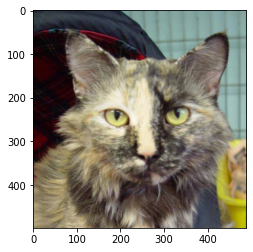

In [7]:
# We take one of the pictures in the trainin set, among the dog pictures
filename = train_cats_dir + '/' + 'cat.10.jpg'
# Load the image in memory
image = matplotlib.image.imread(filename)
# print the image shape
print(image.shape)
# Display the image
plt.imshow(image)
plt.show()

We define some helper objects for the training of the model.

In [3]:
# The rescale of the values of the input image from [0, 255] to [0, 1] is done here.
data_generator = ImageDataGenerator(rescale=1.0/255.0)
# We create that will automatically load the images from the training and validation folders, and zill pass them to the model during the training
train_iterator = data_generator.flow_from_directory(train_dir, class_mode='categorical', batch_size=32, target_size=(128, 128))
test_iterator = data_generator.flow_from_directory(validation_dir, class_mode='categorical', batch_size=32, target_size=(128, 128))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Exercise 1: Define the simplest model

As a first step, we're going to try to use the simplest neural network possible solve this problem. Let's see what accuracy we can reach for this task of classifying cats and dogs pictures.

In [14]:
### START CODE HERE ###
model = Sequential()
model.add(Flatten(input_shape=(128, 128, 3)))
model.add(Dense(2, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()


### END CODE HERE

history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 98306     
                                                                 
Total params: 98,306
Trainable params: 98,306
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 9s 146ms/step - loss: 2.5080 - accuracy: 0.4970 - val_loss: 0.9030 - val_accuracy: 0.5600
Epoch 2/10
63/63 [==============================] - 9s 142ms/step - loss: 1.0201 - accuracy: 0.5925 - val_loss: 1.4885 - val_accuracy: 0.5210
Epoch 3/10
63/63 [==============================] - 9s 137ms/step - loss: 1.4292 - accuracy: 0.5680 - val_loss: 2.2198 - val_accuracy: 0.5110
Epoch 4/10
63/63 [==

KeyboardInterrupt: ignored

#Exercise 2: Define a more complex densely-connected model

As a second step, try more complex neural network. What is the best accuracy that you can achieve?.

In [10]:
### START CODE HERE ###

model = Sequential()
model.add(Flatten(input_shape=(128, 128, 3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

### END CODE HERE

history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 49152)             0         
                                                                 
 dense_14 (Dense)            (None, 512)               25166336  
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 2)                 258       
                                                                 
Total params: 25,330,818
Trainable params: 25,330,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
63/63 [========================

#First convolutional network

The structure of the network we're going to create is:

(128,128,3) --- convolution ---> (128,128,32) --- pooling ---> (64,64,32) --- dense ---> 32 ---> 1

In [15]:
# The model is a sequential model, as usual so far
model = Sequential()
# First layer of neurons after the input layer in a convolutional layer, with 32 filters, of size 3x3x3
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
# Then we apply a pooling to reduce the size of the layer
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                4194336   
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,195,298
Trainable params: 4,195,298
Non-trainable params: 0
____________________________________________

##Exercise 3: Visualize the training

Define a **visualize_training** function to be able to plot the evolution of the losses and the accuracies during the training. Did something noticeable happen during the training?

In [4]:
def visualize_training(history):
  ### START CODE HERE
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc='lower right')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc='upper left')
  plt.show()

visualize_training(history)

  ### END CODE HERE

visualize_training(history)

NameError: ignored

##Visualize the output of each layer

One good thing with convolutional layers is that it keeps the image structure and you can visualize the output of the layers.

In [11]:
#Display the layers of our model
model.layers

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (InputLayer)  [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
(1, 49152)


IndexError: ignored

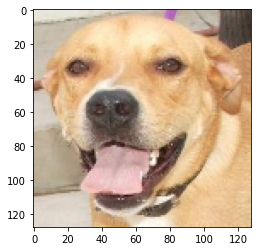

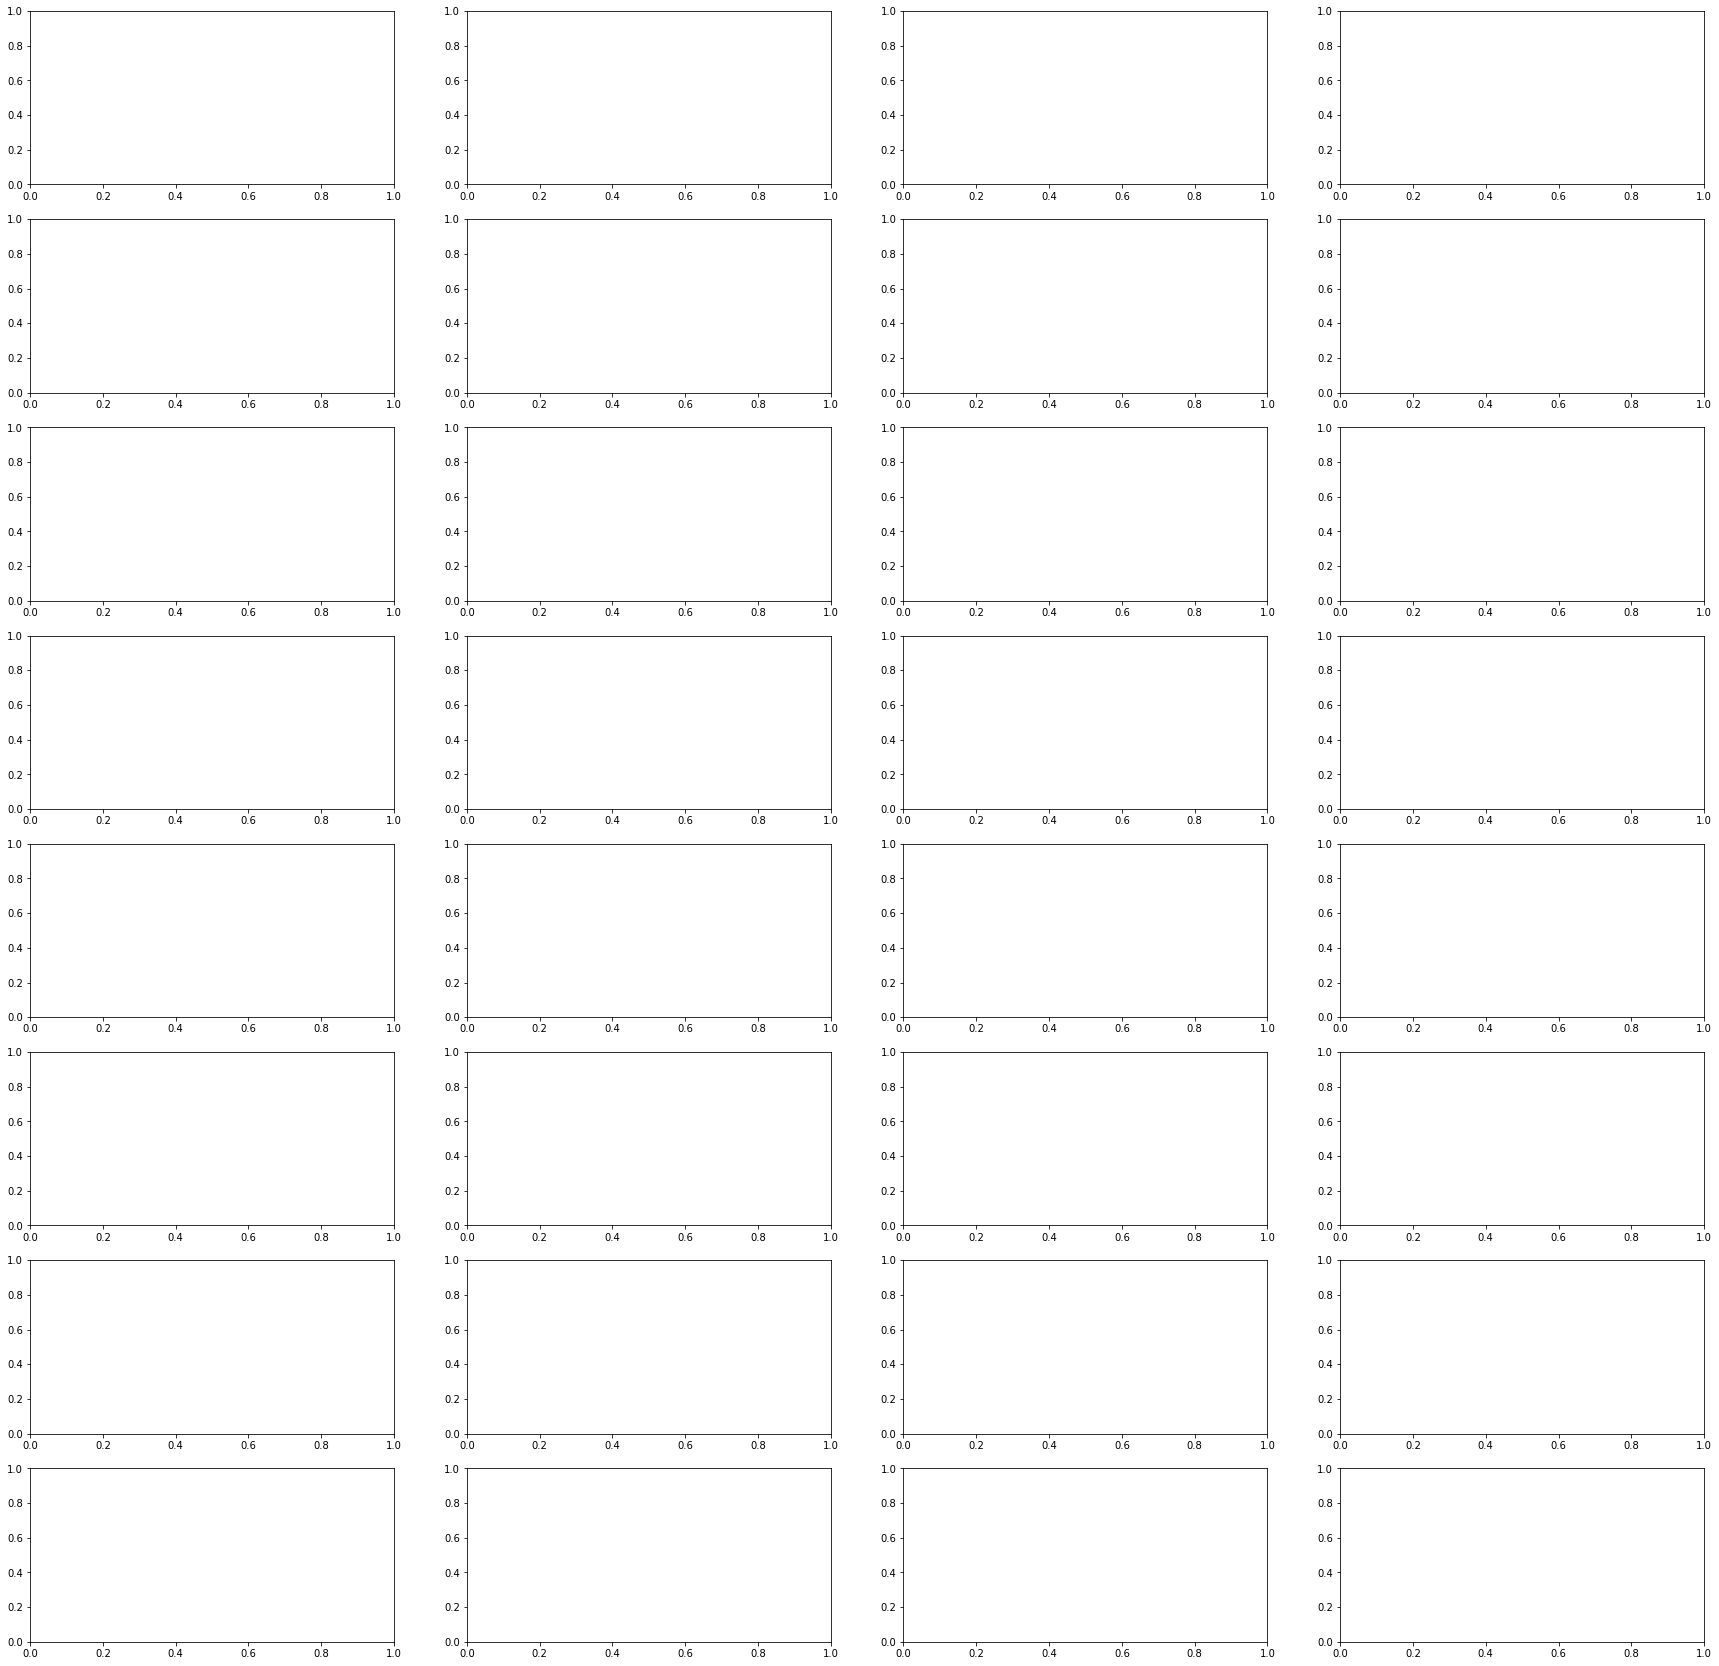

In [12]:
# Create a submodel from the model we've just train, only with the first layer (the convolutional one)
submodel = Model(model.layers[0].input, model.layers[0].output)
# We need to compile it to be able to use it
submodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Let's display a quick summary of the model
submodel.summary()

# Open a picture from the validation dataset
filename = validation_dogs_dir + '/dog.2001.jpg'
# Load the image from the file in memory
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(128,128))
image = image / 255
# Display the image
plt.imshow(image)
# Feed the submodel into the submodel
filtered_images = submodel.predict(image.reshape((1,128,128,3)))
# Display the shape of the array output by the submodel
print(filtered_images.shape)
# Then finally plot the output of the submodel
fig, axs = plt.subplots(8, 4, figsize=(30,30))
for i in range(0,8):
  for j in range(0,4):
    k = 4*i+j
    axs[i, j].imshow(filtered_images[0,:,:,k], cmap='gray', vmin=0, vmax=1)

#Exercise 4: Data augmentation

Use Keras available data augmentation capabilities to improve your network accuracy. See [Keras documentation](https://keras.io/api/preprocessing/image/) to see how to use the ImageDataGenerator from a directory.

In [26]:
### START CODE HERE
data_generator = ImageDataGenerator(rescale=1.0/255.0,
                                    rotation_range=30,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    width_shift_range= 0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip= True)
# We create that will automatically load the images from the training and validation folders, and zill pass them to the model during the training
train_iterator = data_generator.flow_from_directory(train_dir, class_mode='categorical', batch_size=128, target_size=(128, 128))
test_iterator = data_generator.flow_from_directory(validation_dir, class_mode='categorical', batch_size=128, target_size=(128, 128))
### END CODE HERE

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

history = model.fit(train_iterator, batch_size=32, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 131072)            0         
                                                                 
 dense_24 (Dense)            (None, 32)                4194336   
                                                                 
 dense_25 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,195,298
Trainable pa

KeyboardInterrupt: ignored

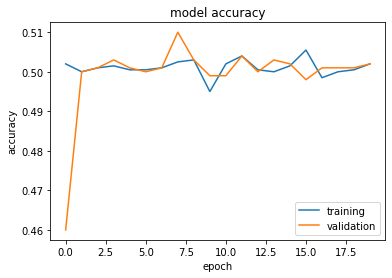

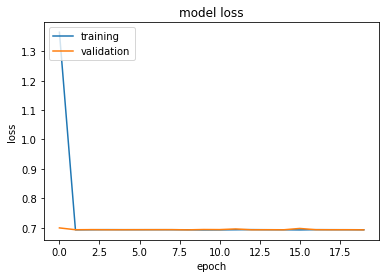

In [27]:
visualize_training(history)

#Exercise 5: Experience deeper neural network designs

Try to stack convolutional layers, and add layers in the densely connected part of the network.

Plot the output of your different filters.

What is the best accuracy you can achieve?

In [26]:
### START CODE HERE ###

data_generator = ImageDataGenerator(rescale=1.0/255.0,
                                    rotation_range=30,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    width_shift_range= 0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip= True)
# We create that will automatically load the images from the training and validation folders, and zill pass them to the model during the training
train_iterator = data_generator.flow_from_directory(train_dir, class_mode='categorical', batch_size=64, target_size=(128, 128))
test_iterator = data_generator.flow_from_directory(validation_dir, class_mode='categorical', batch_size=64, target_size=(128, 128))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

### END CODE HERE ###

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

complex_model = model

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       73856     
                                    

In [29]:
augmented_data_generator = ImageDataGenerator(rescale=1.0/255.0,
                                    rotation_range=30,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    width_shift_range= 0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip= True)
data_generator = ImageDataGenerator(rescale=1.0/255.0)
# We create that will automatically load the images from the training and validation folders, and zill pass them to the model during the training
train_iterator = augmented_data_generator.flow_from_directory(train_dir, class_mode='categorical', batch_size=32, target_size=(128, 128))
test_iterator = data_generator.flow_from_directory(validation_dir, class_mode='categorical', batch_size=32, target_size=(128, 128))

history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
63/63 [==============================] - 17s 267ms/step - loss: 0.6170 - accuracy: 0.7090 - val_loss: 0.5488 - val_accuracy: 0.7270
Epoch 2/10
63/63 [==============================] - 17s 268ms/step - loss: 0.5160 - accuracy: 0.7465 - val_loss: 0.5239 - val_accuracy: 0.7400
Epoch 3/10
63/63 [==============================] - 17s 272ms/step - loss: 0.5084 - accuracy: 0.7455 - val_loss: 0.5100 - val_accuracy: 0.7490
Epoch 4/10
63/63 [==============================] - 17s 274ms/step - loss: 0.4887 - accuracy: 0.7645 - val_loss: 0.5591 - val_accuracy: 0.7270
Epoch 5/10
63/63 [==============================] - 17s 274ms/step - loss: 0.4787 - accuracy: 0.7675 - val_loss: 0.5013 - val_accuracy: 0.7450
Epoch 6/10
63/63 [==============================] - 17s 269ms/step - loss: 0.4926 - accuracy: 0.7560 - val_loss: 0.5430 - val_accuracy: 0.7330
Epoch 7/10
63/63 [==============================] - 17s 26

#Learning transfer

Use the well-known VGG network to try to improve the qccurqcy of your network.


In [30]:
# Import the VGG model which is already - well - trained
input_tensor = Input(shape=(128, 128, 3))
vgg_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Display summary of the VGG model
vgg_model.summary()

# Flag all VGG layers as not trainable so that when we'll train the complete it doesn't try to adjust the parameters of those first layers
for layer in vgg_model.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [32]:
# Get the last layer of the VGG model
vgg_output = vgg_model.layers[-1].output
# Flatten this last layer
output = tf.keras.layers.Flatten()(vgg_output)
# Then construct the remaining of the model
output = Dense(256, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(2, activation='softmax')(output)
# Create a model from the input to the output
model = Model(input_tensor, output)

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

history = model.fit(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

#Exercise 6: Visualize the output of the different VGG layers

Use the same processes we used before to display the output of the filters in the VGG layers.

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
Total params: 112,576
Trainable params: 0
Non-trainable params: 112,576
_________________________________________________________________
(1, 64, 64, 128)


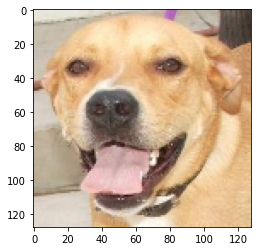

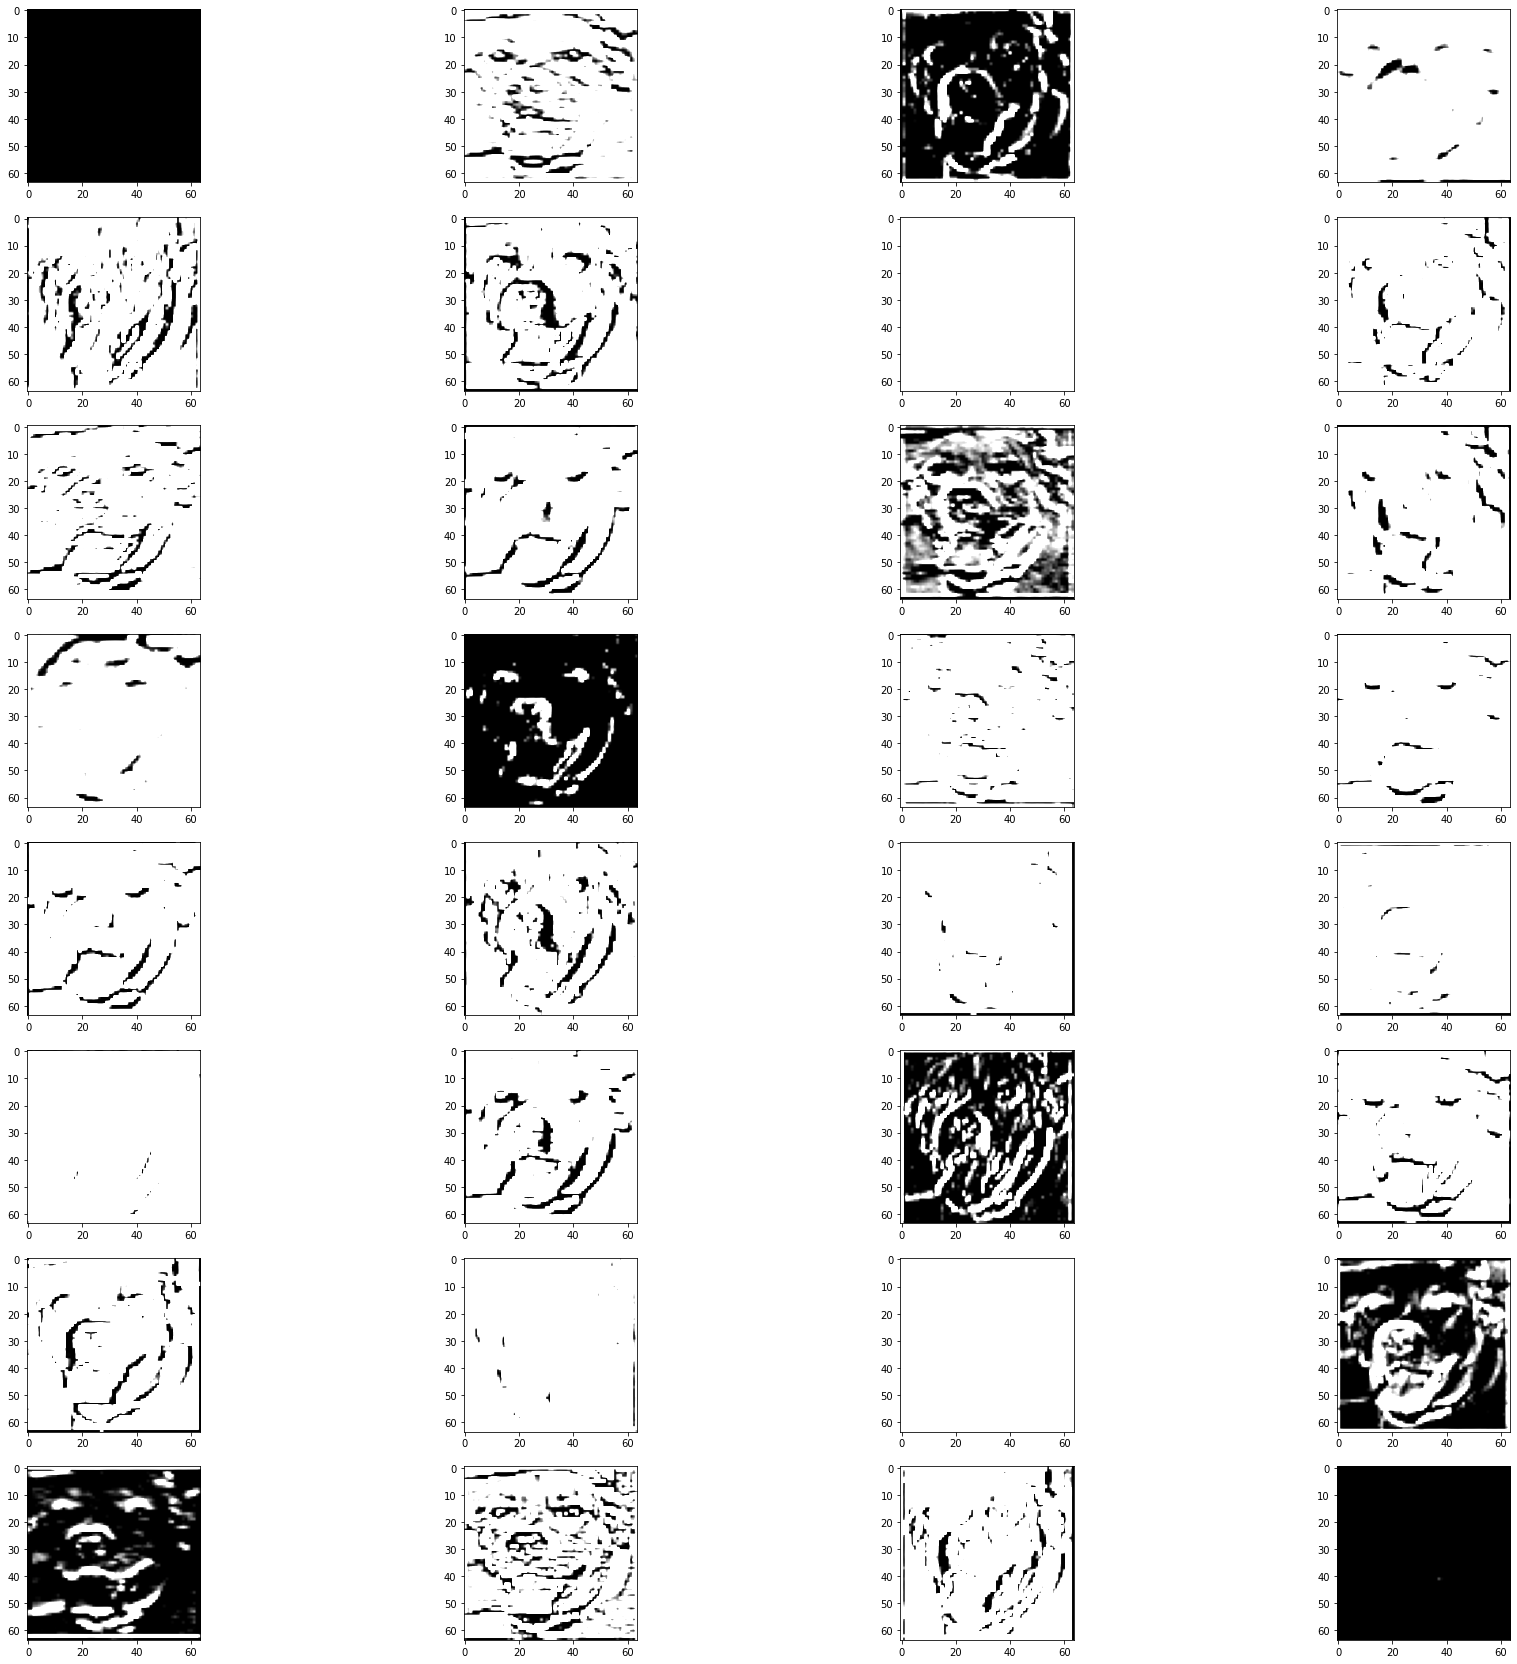

In [36]:
### START CODE HERE
#Checking in 4th layer
submodel = Model(model.layers[0].input, model.layers[4].output)
# We need to compile it to be able to use it
submodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Let's display a quick summary of the model
submodel.summary()

# Open a picture from the validation dataset
filename = validation_dogs_dir + '/dog.2001.jpg'
# Load the image from the file in memory
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(128,128))
image = image / 255
# Display the image
plt.imshow(image)
# Feed the submodel into the submodel
filtered_images = submodel.predict(image.reshape((1,128,128,3)))
# Display the shape of the array output by the submodel
print(filtered_images.shape)
# Then finally plot the output of the submodel
fig, axs = plt.subplots(8, 4, figsize=(30,30))
for i in range(0,8):
  for j in range(0,4):
    k = 4*i+j
    axs[i, j].imshow(filtered_images[0,:,:,k], cmap='gray', vmin=0, vmax=1)

### END CODE HERE

#Exercise 7: Try to trick your neural network


We create and train a model on a smaller input, only 64 by 64, for memory consumption reasons.

In [38]:
data_generator = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True, rotation_range=20, zoom_range=0.2, shear_range=0.2, width_shift_range=0.2, height_shift_range=0.2)
train_iterator = data_generator.flow_from_directory(train_dir, class_mode='categorical', batch_size=32, target_size=(64, 64))
test_iterator = data_generator.flow_from_directory(validation_dir, class_mode='categorical', batch_size=32, target_size=(64, 64))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

history = model.fit(train_iterator, batch_size=32, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 128)       73856     
                                    

We're going to see if, by slightly modifying the input images, we can confuse the neural network and make it classify a dog for a cat.

First let's find an image correctly predicted by the neural network.

{'cats': 0, 'dogs': 1}
[[0.23097813 0.7690219 ]]


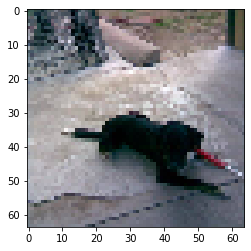

In [52]:
print(train_iterator.class_indices)

filename = train_dogs_dir + '/' + train_dog_fnames[2]
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(64,64))
image = image / 255

plt.imshow(image)

prediction = model.predict(image.reshape((1,64,64,3)))

print(prediction)

Then for each pixel, we compute if increasing the value of the pixel makes the prediction better or worse. If it makes it better, we then record a positive value for the derivative. If it makes it worse, we record a negative value.

In [53]:
# Initial prediction of the model
initial_prediction = model.predict(image.reshape((1,64,64,3)))[0][1]
# By how much we will increase the pixel to detect a difference in the prediction of the model
delta = 0.001
# The derivate for each pixel, same shape os the original image
derivative = np.zeros((64,64,3))

# We loop on each color
for k in range(0,3):  
  print(f"Generating differential images for color {k}...")
  image_modified = np.zeros((64 * 64, 64, 64, 3))
  # we loop on each column
  for i in range(0,64):
    # we loop on each row
    for j in range(0,64):    
      index = 64 * i + j
      image_modified[index,:,:,:] = image
      image_modified[index,i,j,k] = image[i,j,k] + delta
  print("Evaluating differential images...")
  predicitions = np.zeros((64 * 64, 2))
  print(f"Computing predicitions for slice {k}...")
  predictions =  model.predict(image_modified)

  derivatives = (predictions - initial_prediction) / delta

  print("Calculating derivative image...")
  for i in range(0,64):
    for j in range(0,64):
      index = 64 * i + j
      derivative[i,j,k]=derivatives[index][1]
  # Free memory
  image_modified = None

Generating differential images for color 0...
Evaluating differential images...
Computing predicitions for slice 0...
Calculating derivative image...
Generating differential images for color 1...
Evaluating differential images...
Computing predicitions for slice 1...
Calculating derivative image...
Generating differential images for color 2...
Evaluating differential images...
Computing predicitions for slice 2...
Calculating derivative image...


As the derivative has the shape of the original image, we can display is as image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


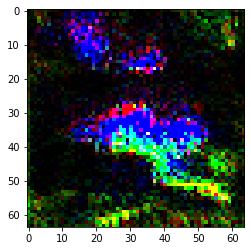

In [54]:
# Values in derivative are small, so we need to amplify the signal
plt.imshow(derivative*150)

Then we use the derivative to compute a tricked image, and observe how the prediction evolves.

{'cats': 0, 'dogs': 1}
[[0.9062556  0.09374437]]


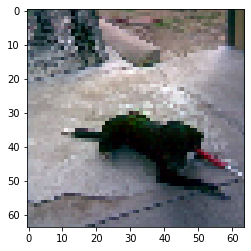

In [55]:
print(train_iterator.class_indices)
# Compute the tricked image by applying negatively the derivative
tricked_image = np.minimum(1, np.maximum(image -  2 * derivative, 0))
# Make the prediction on the tricked image
print(model.predict(tricked_image.reshape((1,64,64,3))))
# Display the tricked image
plt.imshow(tricked_image)